In [120]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('bonds.csv')

# Get the unique number of ISIN
unique_isin_count = df['ISIN'].nunique()

# Display the unique number of ISIN
print(unique_isin_count)

print(df['ISIN'].size)
    

10539
341372


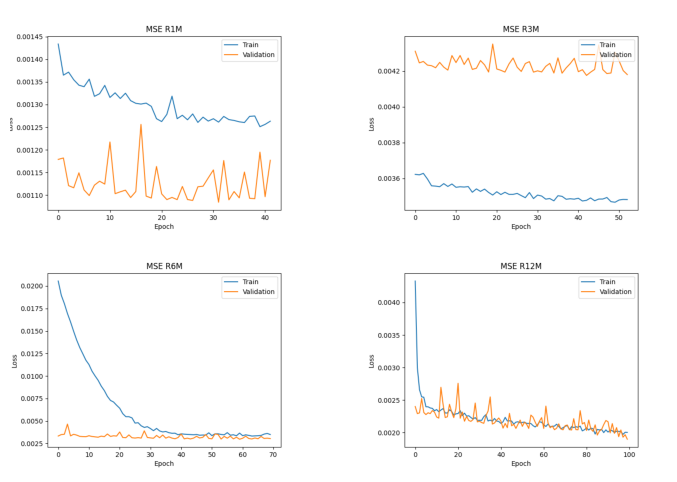

In [2]:
import matplotlib.pyplot as plt
import os

# Path to the DataPreprocessing folder
folder_path = "Ensemble"

# List of file names for the distributions
file_names = ["loss_R1M.png", "loss_R3M.png", "loss_R6M.png", "loss_R12M.png"]

# Create a 2 by 2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(9, 6))

# Iterate over the file names and plot each distribution in a subplot
for i, file_name in enumerate(file_names):
    # Get the row and column index for the subplot
    row = i // 2
    col = i % 2
    
    # Load the image and display it in the corresponding subplot
    img_path = os.path.join(folder_path, file_name)
    img = plt.imread(img_path)
    axs[row, col].imshow(img)
    axs[row, col].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# Save the merged image
merged_path = os.path.join(folder_path, "merged_distributions.png")
plt.savefig(merged_path, bbox_inches='tight')
plt.show()

In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def read_excel_sheets(path):
    # Open the excel file
    xl = pd.ExcelFile(path)
    # Create an empty list to store the dataframes
    dfs = []
    # Loop through each sheet in the excel file
    for sheet_name in xl.sheet_names:
        # Read the sheet into a dataframe
        df = pd.read_excel(xl, sheet_name)
        # Add a column with the sheet name
        # First parse the sheet name so it´s a date. It comes in the format: "short month day year"
        if sheet_name[0:4] == "Aprl":
            sheet_name = "April"+sheet_name[4:]
        df['Date'] = pd.to_datetime(sheet_name, format='mixed')
        # Append the dataframe to the list
        dfs.append(df)
    # Concatenate all the dataframes into a single dataframe
    result = pd.concat(dfs, ignore_index=True)
    return result


def calculate_returns(data):    
    data = data.sort_values(['ISIN', 'Date'])
    data['R1M'] = data.groupby('ISIN')['Price'].pct_change()
    data['R1M'] = data.groupby('ISIN')['R1M'].shift(-1)
    data['R3M'] = data.groupby('ISIN')['Price'].pct_change(3)
    data['R3M'] = data.groupby('ISIN')['R3M'].shift(-3)
    data['R6M'] = data.groupby('ISIN')['Price'].pct_change(6)
    data['R3M'] = data.groupby('ISIN')['R3M'].shift(-6)
    data['R12M'] = data.groupby('ISIN')['Price'].pct_change(12)
    data['R3M'] = data.groupby('ISIN')['R3M'].shift(-12)
    return data.replace([np.inf, -np.inf], np.nan).dropna()



def feature_correlation(df):
    correlation = df.corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.matshow(correlation, cmap='coolwarm')
    fig.colorbar(cax)
    plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
    plt.yticks(range(len(correlation.columns)), correlation.columns)
    plt.savefig('DataPreprocessing/correlation_matrix.png')



In [94]:
dfs = []
xc = ["Data\LUACTRUU Index 2018-2020.xlsx", 
        "Data\LUACTRUU Index 2023-2021.xlsx", 
        "Data\LUACTRUU Index Data (2015-2013).xlsx", 
        "Data\LUUACTRUU Index 2017-2016.xlsx", 
        "Data\LF98TRUU Index 2013.xlsx", 
        "Data\LF98TRUU Index (2014-2023).xlsb"]

for i in xc:
    dfs.append(read_excel_sheets(i))
    print(i)
data = pd.concat(dfs, ignore_index=True)

og = data



Data\LUACTRUU Index 2018-2020.xlsx
Data\LUACTRUU Index 2023-2021.xlsx
Data\LUACTRUU Index Data (2015-2013).xlsx
Data\LUUACTRUU Index 2017-2016.xlsx
Data\LF98TRUU Index 2013.xlsx
Data\LF98TRUU Index (2014-2023).xlsb


In [101]:
data = og

In [111]:
plot_categorical_distribution(data, ['Index Rating (String)', 'BCLASS 2', 'Payment Rank'])


In [113]:
le = LabelEncoder()
data['Index Rating (String)'] = le.fit_transform(data['Index Rating (String)'])
data = data.rename(columns={'Index Rating (String)': 'Index Rating'})
data['BCLASS 2'] = le.fit_transform(data['BCLASS 2'])

In [114]:
og =data

In [115]:

data = data.sort_values(['ISIN', 'Date'])
data.head(5)



,ISIN,Price,YTW,OAD,Par Val,MV,Weight,YTM,Maturity,Index Rating,BCLASS 2,Cpn,Date
949810,NO0010920952,106.047,3.90010,2.273,200000.0,219136.0,0.013195,3.90010,2.458333,11,2,6.5,2021-08-19
952033,NO0010920952,106.385,3.67517,2.199,200000.0,214323.0,0.012853,3.67517,2.380556,11,2,6.5,2021-09-17
954267,NO0010920952,106.277,3.62268,2.115,200000.0,215262.0,0.012965,3.62268,2.291667,11,2,6.5,2021-10-19
956525,NO0010920952,105.914,3.68655,2.031,200000.0,215620.0,0.012941,3.68655,2.208333,11,2,6.5,2021-11-19
958762,NO0010920952,105.101,3.98011,1.952,200000.0,215005.0,0.013076,3.98011,2.130556,11,2,6.5,2021-12-17


In [116]:
data['R1M'] = data.groupby('ISIN')['Price'].pct_change()
data.head()

,ISIN,Price,YTW,OAD,Par Val,MV,Weight,YTM,Maturity,Index Rating,BCLASS 2,Cpn,Date,R1M
949810,NO0010920952,106.047,3.90010,2.273,200000.0,219136.0,0.013195,3.90010,2.458333,11,2,6.5,2021-08-19,NaN
952033,NO0010920952,106.385,3.67517,2.199,200000.0,214323.0,0.012853,3.67517,2.380556,11,2,6.5,2021-09-17,0.003187
954267,NO0010920952,106.277,3.62268,2.115,200000.0,215262.0,0.012965,3.62268,2.291667,11,2,6.5,2021-10-19,-0.001015
956525,NO0010920952,105.914,3.68655,2.031,200000.0,215620.0,0.012941,3.68655,2.208333,11,2,6.5,2021-11-19,-0.003416
958762,NO0010920952,105.101,3.98011,1.952,200000.0,215005.0,0.013076,3.98011,2.130556,11,2,6.5,2021-12-17,-0.007676


In [117]:
data['R1M'] = data.groupby('ISIN')['R1M'].shift(-1)
data['R3M'] = data.groupby('ISIN')['Price'].pct_change(3)
data['R3M'] = data.groupby('ISIN')['R3M'].shift(-3)
data['R6M'] = data.groupby('ISIN')['Price'].pct_change(6)
data['R3M'] = data.groupby('ISIN')['R3M'].shift(-6)
data['R12M'] = data.groupby('ISIN')['Price'].pct_change(12)
data['R3M'] = data.groupby('ISIN')['R3M'].shift(-12)

In [118]:
data = data.replace([np.inf, -np.inf], np.nan).dropna()


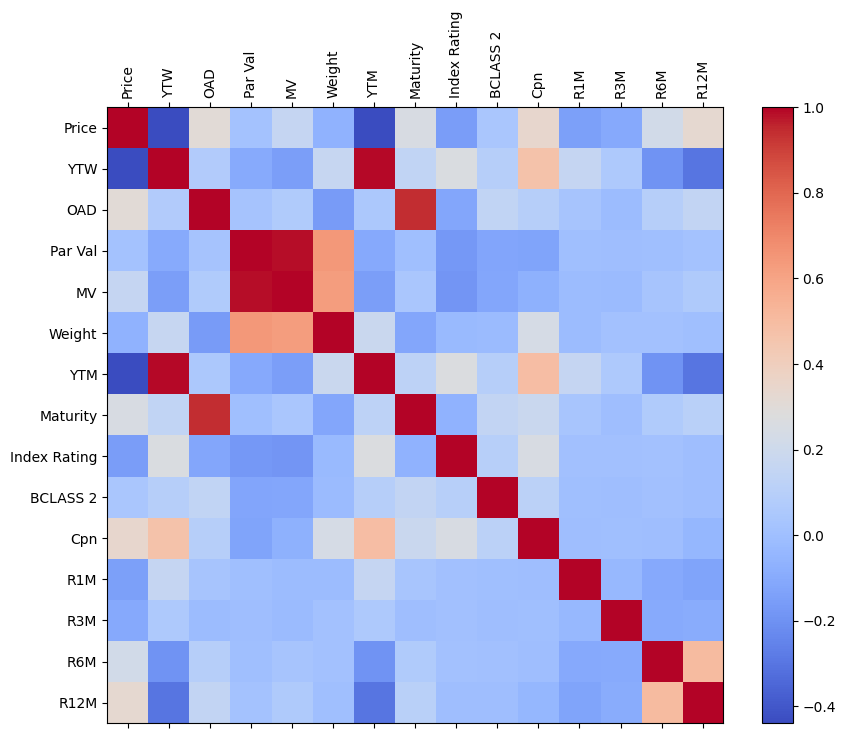

In [119]:
feature_correlation(data.drop(columns=['ISIN', 'Date']))
#high correlation with YTW, Par Val and OAD
data = data.drop(columns=['YTW', 'Par Val', 'OAD'])

data.to_csv('bonds.csv', index=False)

# Split the data by date
last_year_data = data[data['Date'] >= data['Date'].max() - pd.DateOffset(years=1)]
remaining_data = data[data['Date'] < data['Date'].max() - pd.DateOffset(years=1)]

last_year_data.to_csv('test_bonds.csv', index=False)
remaining_data.to_csv('train_bonds.csv', index=False)

In [21]:
import joblib

# Load the SVM models
model = joblib.load('GradientBoosting/modelR12M.pkl')

model.get_params()



{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.01,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}